# Reti neurali
**Winsconsis Breast Cancer Dataset**.


In [2]:
import tensorflow
print(tensorflow.__version__)

2.4.1


In [3]:
#%tensorflow_version 1.x

In [1]:
import tensorflow
print(tensorflow.__version__)

2.3.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Carichiamo il Winsconsis breast cancer dataset all'interno di un DataFrame.

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data",
                        names=["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean",
                               "compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean",
                               "radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se",
                               "concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst",
                               "area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst",
                               "fractal_dimension_worst"])

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Creiamo gli array numpy per addestrare e testare la nostra rete neurale.

In [6]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

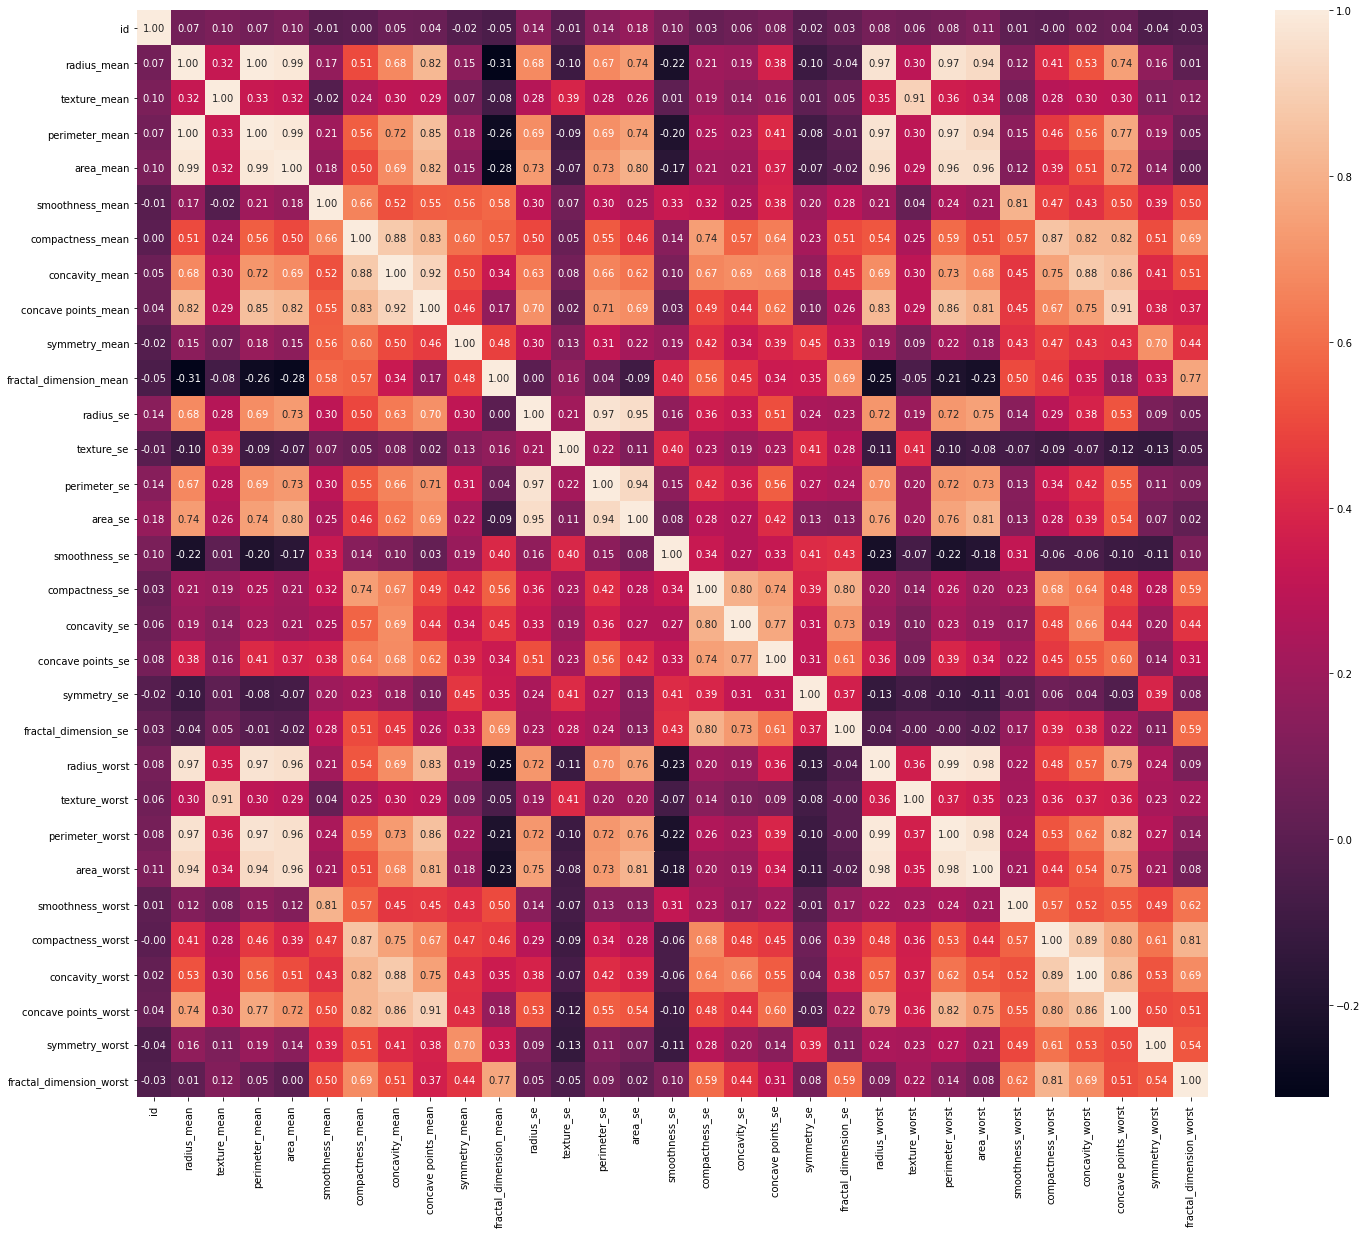

In [7]:
import seaborn as sns

plt.figure(figsize=(24,20))
sns.heatmap(df.corr(), annot=True,fmt='.2f')

## Target= diagnosis -- binary classes

In [8]:
X = df.drop(['diagnosis','id'],axis=1).values
y = df['diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667)

Codifichiamo i label della nostra variabile target in numeri.

In [9]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Standardizziamo gli array con le features.

In [10]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [11]:
X_train.shape

(398, 30)

Adesso possiamo passare alla costruzione della nostra rete neurale artificiale, il primo modello che andremo a creare sarà così composto:
* **30 nodi** nello strato di input, pari al numero di features del dataset.
* **12 nodi** nello strato nascosto, numero scelto arbitrariamente da noi. 
* **1 nodo** nello strato di output, dato che si tratta di una classificazione binaria.

La funzione di attivazione che utilizzeremo per lo strato nascosto è la **ReLU**, mentre, trattandosi di un problema di classificazione binaria, per lo strato di output utilizzeremo la sigmoide. [Qui](https://keras.io/activations/) puoi vedere l'elenco completo delle **funzioni di attivazione di base** disponibili con Keras.

In [12]:
X_train.shape[1]

30

In [13]:
import tensorflow as tf
tf.random.set_seed(667) 

model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

Utilizziamo il metodo compile per configurare la fase di addestramento, specificando come funzione di ottimizzazione lo **Stochastic Gradient Descent** come funzione da minimizzare la **binary cross entropy** e aggiungiamo come metrica aggiuntiva da visualizzare durante il training l'**accuracy**.

In [14]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare il numero di parametri totali che la nostra rete dovrà ottimizzare.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                372       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


Abbiamo 385 parametri in totale:
* 1 - Un peso per ogni connessione dai 30 nodi di input ai 12 nodi dell' hidden layer (30x12=360), più un bias per ogni nodonell'hidden layer (12). =360+12
* 2 - Un peso per ogni connessione dell'hidden layer all'unico nodo dello strato di output (12), più un bias (1)

Facciamo partire l'addestramento.

In [16]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 769us/step - loss: 0.8874 - accuracy: 0.3794
Epoch 2/100
13/13 [==============================] - 0s 614us/step - loss: 0.7093 - accuracy: 0.5452
Epoch 3/100
13/13 [==============================] - 0s 692us/step - loss: 0.5974 - accuracy: 0.6784
Epoch 4/100
13/13 [==============================] - 0s 769us/step - loss: 0.5202 - accuracy: 0.7889
Epoch 5/100
13/13 [==============================] - 0s 768us/step - loss: 0.4634 - accuracy: 0.8367
Epoch 6/100
13/13 [==============================] - 0s 692us/step - loss: 0.4179 - accuracy: 0.8794
Epoch 7/100
13/13 [==============================] - 0s 770us/step - loss: 0.3811 - accuracy: 0.8970
Epoch 8/100
13/13 [==============================] - 0s 769us/step - loss: 0.3514 - accuracy: 0.9146
Epoch 9/100
13/13 [==============================] - 0s 768us/step - loss: 0.3265 - accuracy: 0.9271
Epoch 10/100
13/13 [==============================] - 0s 771us/step - loss: 0.3052 - accura

13/13 [==============================] - 0s 845us/step - loss: 0.0746 - accuracy: 0.9774
Epoch 82/100
13/13 [==============================] - 0s 922us/step - loss: 0.0741 - accuracy: 0.9774
Epoch 83/100
13/13 [==============================] - 0s 925us/step - loss: 0.0735 - accuracy: 0.9774
Epoch 84/100
13/13 [==============================] - 0s 926us/step - loss: 0.0730 - accuracy: 0.9774
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9774
Epoch 86/100
13/13 [==============================] - 0s 922us/step - loss: 0.0721 - accuracy: 0.9774
Epoch 87/100
13/13 [==============================] - 0s 817us/step - loss: 0.0716 - accuracy: 0.9774
Epoch 88/100
13/13 [==============================] - 0s 931us/step - loss: 0.0711 - accuracy: 0.9774
Epoch 89/100
13/13 [==============================] - 0s 692us/step - loss: 0.0706 - accuracy: 0.9774
Epoch 90/100
13/13 [==============================] - 0s 922us/step - loss: 0.0702 - accuracy: 0.

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 98% e un valore per la funzione di costo di 0.082, verifichiamo il risultato anche sul set di test.

In [17]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9766
Loss sul test set: 0.1044
Accuracy sul test set: 0.9766


Confrontando il risultato con quanto fatto in [questo precedente notebook](https://github.com/ProfAI/dl00/blob/master/3%20-%20Machine%20Learning%20in%20breve/Regressione%20logistica%20con%20Keras.ipynb), possiamo osservare come una rete neurale artificiale abbia portanto un risultato migliore rispetto a una semplice regressione logistica, specialmente per quanto riguarda l'incertezza dell'errore.

## Reti neurali artificiali profonde
Adesso proviamo a costruire una rete neurale artificiale profonda, cioè una rete neurale che ha più di uno strato nascosto, nello specifica la nostra rete neurale profonda sarà così composta:
* **30 nodi** nello strato di input
* **12 nodi** nel primo strato nascosto
* **8 nodi** nel secondo strato nascosto
* **4 nodi** nel secondo strato nascosto
* **1 nodo** nello strato di input

Come funzione di attivazione utilizzeremo sempre la ReLU per gli strati nascosti e la sigmoide per lo strato di output.

In [18]:
tf.random.set_seed(667) 
model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

Utilizziamo il metodo summary per osservare quanti parametri dovrà ottimizzare il nostro modello questa volta.

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


Adesso son ben 517, facciamo partire l'addestramento.

In [20]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 924us/step - loss: 0.6909 - accuracy: 0.4673
Epoch 2/100
13/13 [==============================] - 0s 770us/step - loss: 0.6684 - accuracy: 0.5930
Epoch 3/100
13/13 [==============================] - 0s 769us/step - loss: 0.6478 - accuracy: 0.6558
Epoch 4/100
13/13 [==============================] - 0s 923us/step - loss: 0.6291 - accuracy: 0.7186
Epoch 5/100
13/13 [==============================] - 0s 999us/step - loss: 0.6125 - accuracy: 0.7613
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.7965
Epoch 7/100
13/13 [==============================] - 0s 845us/step - loss: 0.5804 - accuracy: 0.8266
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.8467
Epoch 9/100
13/13 [==============================] - 0s 923us/step - loss: 0.5499 - accuracy: 0.8618
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.

13/13 [==============================] - 0s 923us/step - loss: 0.1751 - accuracy: 0.9673
Epoch 82/100
13/13 [==============================] - 0s 846us/step - loss: 0.1735 - accuracy: 0.9673
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9673
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1702 - accuracy: 0.9673
Epoch 85/100
13/13 [==============================] - 0s 957us/step - loss: 0.1687 - accuracy: 0.9673
Epoch 86/100
13/13 [==============================] - 0s 847us/step - loss: 0.1672 - accuracy: 0.9724
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1657 - accuracy: 0.9724
Epoch 88/100
13/13 [==============================] - 0s 923us/step - loss: 0.1642 - accuracy: 0.9724
Epoch 89/100
13/13 [==============================] - 0s 846us/step - loss: 0.1627 - accuracy: 0.9724
Epoch 90/100
13/13 [==============================] - 0s 923us/step - loss: 0.1613 - accuracy: 0.9724

All'epoca 100 il nostro modello ha ottenuto sul set di addestramento un'accuracy del 99% e un valore per la funzione di costo di 0.14, verifichiamo il risultato anche sul set di test.

In [21]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 835us/step - loss: 0.1748 - accuracy: 0.9591
Loss sul test set: 0.1748
Accuracy sul test set: 0.9591


Aggiungendo due nuovi strati le performance della nostra rete sono migliorate.

## Leaky ReLU
Reimplentiamo lo stesso modello, questa volta utilizzando la Leaky ReLU come funzione di attivazione per gli strati nascosti. La Leaky ReLU fa parte delle **funzioni di attivazioni avanzate** di Keras, che puoi trovare [qui](https://keras.io/layers/advanced-activations/).
<br>
Queste funzioni di attivazioni vanno aggiunte a un modello come fossero degli strati e non passate come parametro della classe Dense, come invece fatto finora.

In [24]:
tf.random.set_seed(667) 
from tensorflow.keras.layers import LeakyReLU

model = Sequential()

model.add(Dense(12, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(4))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 769us/step - loss: 0.6826 - accuracy: 0.6332
Epoch 2/100
13/13 [==============================] - 0s 692us/step - loss: 0.6059 - accuracy: 0.6558
Epoch 3/100
13/13 [==============================] - 0s 846us/step - loss: 0.5532 - accuracy: 0.6809
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5196 - accuracy: 0.7060
Epoch 5/100
13/13 [==============================] - 0s 846us/step - loss: 0.4941 - accuracy: 0.7387
Epoch 6/100
13/13 [==============================] - 0s 923us/step - loss: 0.4728 - accuracy: 0.7613
Epoch 7/100
13/13 [==============================] - 0s 846us/step - loss: 0.4553 - accuracy: 0.7839
Epoch 8/100
13/13 [==============================] - 0s 769us/step - loss: 0.4403 - accuracy: 0.8065
Epoch 9/100
13/13 [==============================] - 0s 923us/step - loss: 0.4270 - accuracy: 0.8116
Epoch 10/100
13/13 [==============================] - 0s 846us/step - loss: 0.4154 - accuracy

Epoch 82/100
13/13 [==============================] - 0s 924us/step - loss: 0.1741 - accuracy: 0.9724
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1728 - accuracy: 0.9724
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1713 - accuracy: 0.9724
Epoch 85/100
13/13 [==============================] - 0s 923us/step - loss: 0.1700 - accuracy: 0.9724
Epoch 86/100
13/13 [==============================] - 0s 926us/step - loss: 0.1687 - accuracy: 0.9724
Epoch 87/100
13/13 [==============================] - 0s 849us/step - loss: 0.1674 - accuracy: 0.9724
Epoch 88/100
13/13 [==============================] - 0s 984us/step - loss: 0.1662 - accuracy: 0.9724
Epoch 89/100
13/13 [==============================] - 0s 923us/step - loss: 0.1649 - accuracy: 0.9724
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1637 - accuracy: 0.9724
Epoch 91/100
13/13 [==============================] - 0s 922us/step - loss: 0.1625 - acc

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("Loss sul test set: %.4f" % loss)
print("Accuracy sul test set: %.4f" % acc)

6/6 [==============================] - 0s 2ms/step - loss: 0.1813 - accuracy: 0.9766
Loss sul test set: 0.1813
Accuracy sul test set: 0.9766


L'utilizzo della funzione Leaky ReLU ci ha permesso di ottenere un modello ancora migliore.

### Matrice di confusione
Nonostante le metriche della nostra rete neurale artificiale siano molto buone, dobbiamo tener conto du un ulteriore fattore. Quando si tratta di riconoscere un tumore, sbagliare nel diagnosticare un tumore maligno come benigno è molto più grave del classificare un tuomore benigno come maligno, infatti in quest'ultimo caso l'errore potrebbe venir fuori dopo ulteriori indagini mediche, mentre nel primo il paziente potrebbe non ricevere cure mediche necessarie per lui a causa dell'errore.
<br><br>
Questo problema è comune in molti problemi di classificazione, per affronterlo ci viene in contro una nuova metrica: la matrice di confusione.
<br>
La matrice di confusione ci permette di comprendere dove il nostro modello ha commesso degli errori.
<br><br>
Creiamo una matrice di confusione utilizzando la funzione <span style="font-family: Monaco">plot_confusion_matrix</span> disponibile all'interno del modulo <span style="font-family: Monaco">viz</span>.



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


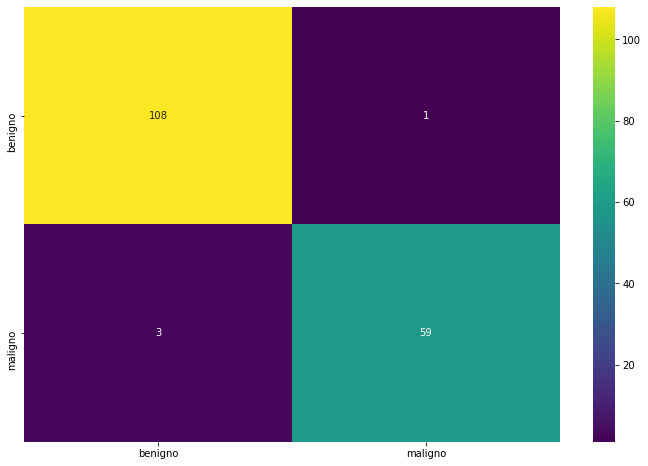

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
labels = ['benigno','maligno']
sns.heatmap(cm,xticklabels=labels,yticklabels=labels,annot=True,fmt=".0f",cmap='viridis');


Osservando la matrice di confusione possiamo vedere che:
1. La rete ha correttamente classificato 108 tumori benigni su 109.
2. La rete ha correttamente classificato 59 tumori maligni su 62
3. La rete ha confuso 3 tumori maligni come tumori benigni.
4. La rete ha confuso 1 tumori benigno come tumore maligno.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



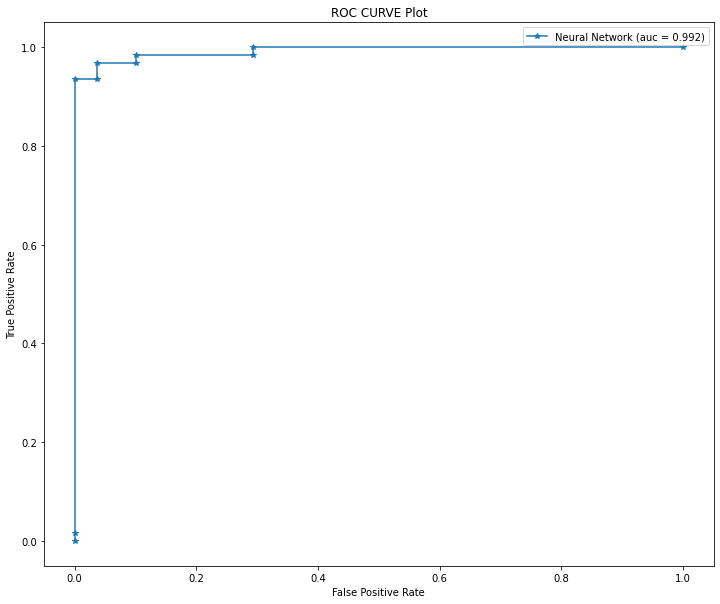

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test).ravel() #flatten array

plt.figure(figsize=(12,10))

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='*', label='Neural Network (auc = %0.3f)' % auc_keras);

# Title
plt.title('ROC CURVE Plot')

#Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Legend
plt.legend();

In [29]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

In [30]:
model.save('breast_cancer.h5') 

In [31]:
load_model = load_model('breast_cancer.h5')

In [32]:
# [[Feature1, Feature2....,Feature[30]]]
new_sample = [[1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10],
             [1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10,1,2,3,4,5,6,7,8,9,10]]
len(new_sample[0])

30

In [33]:
scaler = MinMaxScaler()
new_sample_scaled = scaler.fit_transform(new_sample)

In [34]:
load_model.predict(new_sample_scaled)

array([[0.5844345],
       [0.5844345]], dtype=float32)

In [48]:
input = np.where((load_model.predict(new_sample_scaled))> 0.5, 1, 0)
input

array([[1],
       [1]])

In [54]:
def pred(x):
    res = []
    for i in x:
        if i==1:
            res.append('benigno')
        else:
            res.append('maligno')
    return res

In [55]:
pred(input)

['benigno', 'benigno']

In [ ]:
##if multiclass:
#prediction = load_model.predict(new_sample_scaled)
#predict_label=np.argmax(prediction,axis=1)